Bayes action (minimum) at risk r 20: 39.51
Bayes action (minimum) at risk r 30: 39.51
Bayes action (minimum) at risk r 40: 38.42
Bayes action (minimum) at risk r 50: 37.63


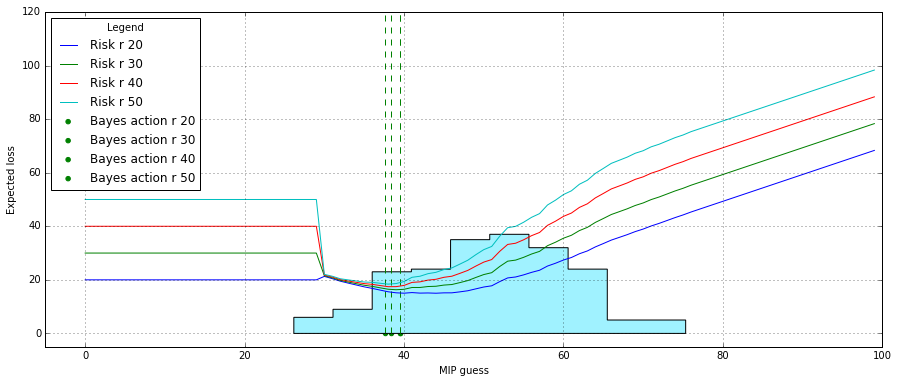

In [9]:
# Fictional and simplified case: Resource extraction project
# Uncertainty about resource quantity/volume, respectively the money in place (MIP) equivalent
# Assumptions:
    # - You have one decision to make: Allocate investment according to the guess you make about the money in place.
    # - Once the investment is allocated, it is set and cannot be adjusted.
    # - There is a cut off limit to the MIP, i.e.: a minimum MIP is needed for the project to be developed.
    # (Make cut off depend on risk?)
    # After investment allocation you probe. 
    # --> If the found MIP is below the cut off, NO extraction takes place, but investment is nevertheless allocated and lost.
        # (1) loss = guess
    # --> If your guess is lower than the true mip, you can't extract the maximum of the resource
    # and you miss out on potential gains.
        # (2) loss = true_MIP - guess
    # --> If you overshoot with your guess, you will allocate more investment than needed. 
    # The extra investment is lost, e.g.: can't be used for other projects (potential gains).
        # (3) loss = guess - true_MIP  
    # A risk parameter is need to represent different affinities to miss the true MIP, particularly overshooting.
    # If we assume the cut_off to be known, it needs no risk assignment as it is no real option.
        # From the above:
        # (1) loss = guess
        # (2) loss = true_MIP - guess
        # (3) loss = (guess + risk) - true_mip

%matplotlib inline
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
import scipy.optimize as sop
    
figsize(15, 6)

def showdown_loss(guess, true_MIP, risk):
        if guess < cut_off:
            return risk
        loss = np.zeros_like(true_MIP)
        #cut = guess < cut_off 
        #loss[~cut] = guess - true_MIP[~cut]
        overshot = guess > true_MIP
        loss[overshot] = np.abs(true_MIP[overshot] - guess) + risk
        loss[~overshot] = true_MIP[~overshot] - guess
        #loss[cut] = guess
        return loss
    
MIP = np.random.normal(50,10,200)
guesses = np.arange(0,100,1)
risks = np.arange(20,60,10)
  
expected_loss = lambda guess, risk: showdown_loss(guess, MIP, risk).mean()

plt.hist(MIP, histtype="stepfilled", color = '#A0F2FF')    
for r in risks:
    cut_off = 30
    loss = [expected_loss(g, r) for g in guesses]
    _min_results = sop.fmin(expected_loss, 40, args=(r,),disp = False)
    plt.plot(guesses, loss, label = "Risk r "+str(r))
    plt.scatter(_min_results, 0, s = 20, color = 'g', label = "Bayes action r "+str(r))
    plt.vlines(_min_results, 0, 120, color = 'g', linestyles="--")
    print("Bayes action (minimum) at risk r %d: %.2f" % (r, _min_results))
    
plt.legend(loc="upper left", scatterpoints=1, title="Legend")
plt.xlabel("MIP guess")
plt.ylabel("Expected loss")
plt.xlim(-5, 100)
plt.ylim(-5, 120)
plt.grid()